In [1]:


from random import randint
import time
import memory_profiler 
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import os, psutil

data = [randint(0, 1000000) for i in range(0, 1000000)]
print(data)

workData=[]

yAxisMemory = []
yAxisTime = []

yAxisMemoryExp = []
yAxisTimeExp = []


yAxisTimeBest = []
yAxisTimeWorst = []
yAxisTimeAvarage = []


yAxisTimeBestExp = []
yAxisTimeWorstExp = []
yAxisTimeAvarageExp = []

best=10
worst=1000
totalTime=0

bestExp=10
worstExp=1000
totalTimeExp=0





xAxis = [100,500,1000]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
def partition(array, begin, end):
    pivot = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot

def quick_sort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    
    def _quicksort(array, begin, end):
        if begin >= end:
            return
        pivot = partition(array, begin, end)
        _quicksort(array, begin, pivot-1)
        _quicksort(array, pivot+1, end)
    return _quicksort(array, begin, end)

In [3]:
def linearSearch(array, x):
    # Going through array sequencially
    n = len(array)
    for i in range(0, n):
        if (array[i] == x):
            return i
    return -1





In [4]:
def binarySearch(array, x, low, high):
    while low <= high:
        mid = int( low + (high - low)//2)
        if array[mid] == x:
            return mid
        elif array[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return -1

def exponentialSearch(arr, x):
    n = len(arr)
    if arr[0] == x:
        return 0
    i = 1
    while i < n and arr[i] <= x:
        i = i * 2
    return binarySearch( arr, x, i / 2 , min(i, n-1))



In [5]:
def analizeFunkTimeLine(numOfIter):
    
    totalTimeI=0
    global worst
    global best
    global totalTime
    
    
    i=0
    k=0
    used_time=0
    workData.clear()
    x=randint(0, numOfIter-1) 
    
    while k<numOfIter:
        workData.append(data[k])
        k+=1
       
    while i<100: 
        j=0
        while j<numOfIter:
            start_time = time.time()
            linearSearch(workData, workData[x])
            stop_time = time.time()
            used_time+=stop_time - start_time
            j+=1 
        if(used_time> best):
            worst=used_time
        else:
            best=used_time
        totalTimeI+=used_time 
        
        i+=1   
    totalTime=totalTimeI 
   
    return used_time/100


def analizeFunkLineMb(numOfIter):
    i=0
    used_memory=0
    k=0
    
    workData.clear()
    x=randint(0, numOfIter-1) 
    
    while k<numOfIter:
        workData.append(data[k])
        k+=1
        
    
    while i<100:
        j=0
        while j<numOfIter:
            process = psutil.Process(os.getpid())
            linearSearch(workData, workData[x])
            
            used_memory+=process.memory_info().rss
            j+=1 
        i+=1      
    return used_memory/100

In [6]:
def analizeFunkTimeExp(numOfIter):
    
    
    totalTimeI=0
    global worst
    global best
    global totalTime
    
    i=0
    k=0
    used_time=0
    workData.clear()
    x=randint(0, numOfIter-1) 
    
    while k<numOfIter:
        workData.append(data[k])
        k+=1
    quick_sort(workData)   
    while i<100: 
        j=0
        while j<numOfIter:
            start_time = time.time()
            exponentialSearch(workData, workData[x])
            stop_time = time.time()
            used_time+=stop_time - start_time
            j+=1 
        if(used_time>  best):
            worstExp=used_time
        else:
            bestExp=used_time
        totalTimeI+=used_time
        i+=1   
    totalTimeExp=totalTimeI    
    return used_time/100


def analizeFunkMbExp(numOfIter):
    i=0
    used_memory=0
    k=0
    workData.clear()
    x=randint(0, numOfIter-1) 
    
    while k<numOfIter:
        workData.append(data[k])
        k+=1
    quick_sort(workData)    
    
    while i<100:
        j=0
        while j<numOfIter:
            process = psutil.Process(os.getpid())
            exponentialSearch(workData, workData[x])
            
            used_memory+=process.memory_info().rss
            j+=1 
        i+=1   
      
    return used_memory/100

In [7]:
for i in xAxis:
    yAxisTime.append(analizeFunkTimeLine(i))
    yAxisMemory.append(analizeFunkLineMb(i))
    
    yAxisTimeExp.append(analizeFunkTimeExp(i))
    yAxisMemoryExp.append(analizeFunkMbExp(i))
    
    
    
    yAxisTimeWorst.append(worst)
    yAxisTimeBest.append(best)
    best=1000
    yAxisTimeAvarage.append(totalTime/i) 
    
    yAxisTimeWorstExp.append(worst)
    yAxisTimeBestExp.append(best)
    bestExp=1000
    yAxisTimeAvarageExp.append(totalTime/i) 
    
    print(i)
  

100
500
1000


<IPython.core.display.Javascript object>


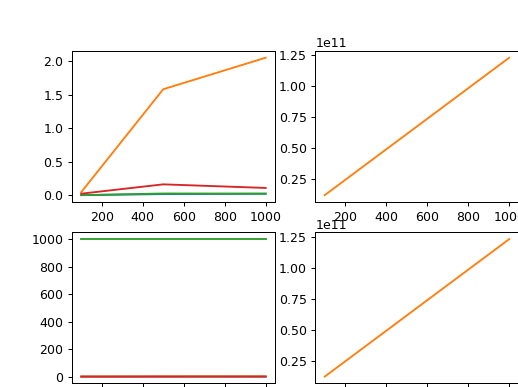

In [8]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xAxis, yAxisTime)
axs[0, 0].plot(xAxis, yAxisTimeBest, 'tab:green')
axs[0, 0].plot(xAxis, yAxisTimeWorst, 'tab:orange')
axs[0, 0].plot(xAxis, yAxisTimeAvarage, 'tab:red')

axs[0, 1].plot(xAxis, yAxisMemory, 'tab:orange')


axs[1, 0].plot(xAxis, yAxisTimeExp)
axs[1, 0].plot(xAxis, yAxisTimeBestExp, 'tab:green')
axs[1, 0].plot(xAxis, yAxisTimeWorstExp, 'tab:orange')
axs[1, 0].plot(xAxis, yAxisTimeAvarageExp, 'tab:red')

axs[1, 1].plot(xAxis, yAxisMemoryExp, 'tab:orange')
